In [252]:
import random

import numpy as np
import matplotlib.pyplot as plt


## Initialization

In [333]:
# nun harmonics
n = 14
# max frequency
w_max = 1800
# num model steps
N = 256


In [334]:
%%time

w_step = w_max // n
w = [i * w_step for i in range(1, n + 1)]
w = np.array(w)
w.resize((n, 1))
print("Frequencies: \n", w)


Frequencies: 
 [[ 128]
 [ 256]
 [ 384]
 [ 512]
 [ 640]
 [ 768]
 [ 896]
 [1024]
 [1152]
 [1280]
 [1408]
 [1536]
 [1664]
 [1792]]
Wall time: 998 µs


## Calculations 

In [343]:
%time

# generate amplitudes and phases
amplitudes = np.random.randint(-100, 100, size=(n, 1))
phases = np.random.randint(-10, 10, size=(n, 1))
harmonics = [np.linspace(0, N, num=N) for i in range(n)]
harmonics = np.array(harmonics)

harmonics = amplitudes * np.sin(w * harmonics + phases)
result_signal = harmonics.sum(axis=0, keepdims=False)

print(result_signal.shape)
print("Amplitudes :\n", amplitudes)
print("Phases :\n", phases)


Wall time: 0 ns
(256,)
Amplitudes :
 [[ 18]
 [ 73]
 [ -6]
 [-98]
 [-63]
 [ 44]
 [ 26]
 [ 49]
 [-61]
 [ 31]
 [  4]
 [ 71]
 [-80]
 [ 61]]
Phases :
 [[ 7]
 [-3]
 [-3]
 [-6]
 [-4]
 [-2]
 [-2]
 [-3]
 [-3]
 [ 7]
 [ 2]
 [ 8]
 [-4]
 [-6]]


In [344]:
%%time

mean = result_signal.mean()
print(mean)

1.061186605500878
Wall time: 0 ns


In [345]:
%%time

dispersion = result_signal.std() ** 2
print(dispersion)

21517.539412289505
Wall time: 0 ns


## Graphs

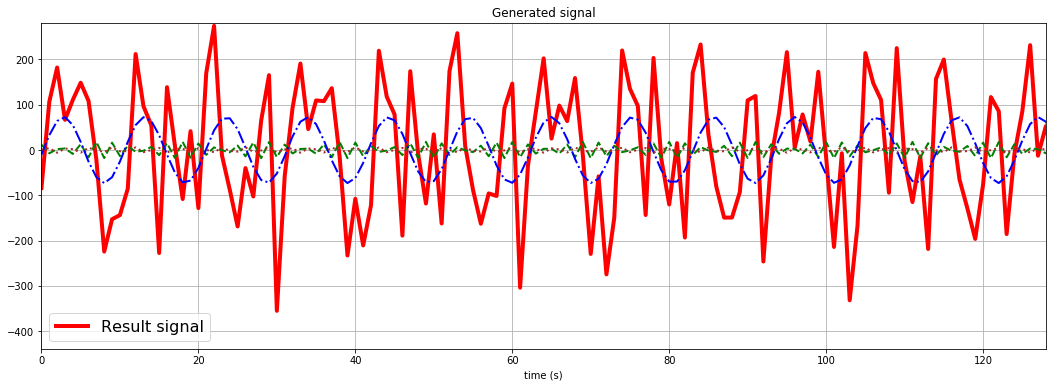

In [346]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set(title="Generated signal", xlabel="time (s)")
ax.plot(result_signal, color="red", linewidth=4)
ax.legend(["Result signal"], fontsize=16, loc=0)
ax.grid()
ax.set(xlim=[0, N/2], ylim=[result_signal.min(), result_signal.max()])
#ax.tick_params(axis='x', direction='inout', length=50)

ax.plot(harmonics[0], color="green", ls='--', linewidth=2)
ax.plot(harmonics[1], color="blue", ls='-.', linewidth=2)
ax.plot(harmonics[2], color="brown", ls=':', linewidth=2)
#ax.plot(harmonics[3], color="green", ls='--', linewidth=1)
#ax.plot(harmonics[4], color="green", ls='--', linewidth=1)
#ax.plot(harmonics[5], color="green", ls='--', linewidth=1)

plt.show()

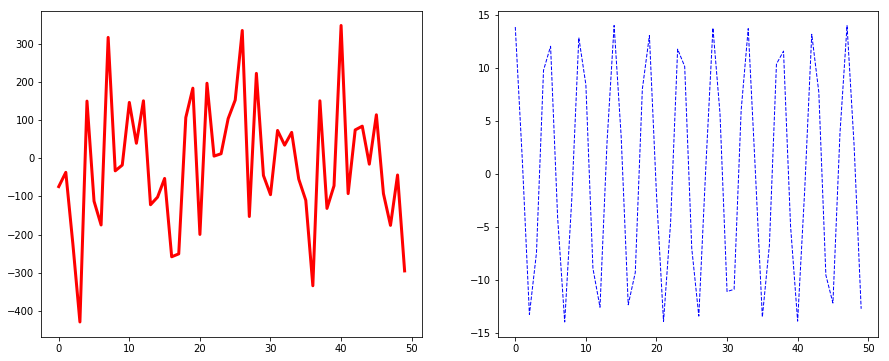

In [332]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)
ax.plot(result_signal, color="red", linewidth=3,)
ax2 = fig.add_subplot(122)
ax2.plot(harmonics[0], color="blue", ls='--', linewidth=1)

plt.show()